In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lp_results(accuracy_means_our,
                    disparity_means_our,
                    accuracy_min_max,
                    disparity_min_max,
                    accuracy_means_auth,
                    disparity_means_auth,
                    dataset_name,
                    ax):
    purple_ = '#BF55EC'
    yellow_ = '#F7CA18'

    labels = ['DeepWalk', 'FairWalk', 'CrossWalk']
    # accuracy_means_our = [77.8538223140496, 74.55320247933882, 72.26497933884299]
    # accuracy_min_max = np.array([[75.69731404958678, 80.13946280991736],[72.62396694214875, 76.18801652892562],[71.30681818181819, 73.4245867768595]])
    acc_err_our = np.array([(mean-min, max-mean) for mean, (min, max) in zip(accuracy_means_our, accuracy_min_max.tolist())]).T

    # disparity_means_our = [6.482281946605251, 3.5463783780743072, 4.854143275091014]
    # disparity_min_max = np.array([[0.5959106358045465, 28.402160397567204], [0.16911859333535692, 13.909153265808861], [0.5987003363942259, 33.18844965572752]])
    disp_err_our = np.array([(mean-min, max-mean) for mean, (min, max) in zip(disparity_means_our, disparity_min_max.tolist())]).T

    x = np.array([2, 5.5, 9]) # the label locations
    width = 0.35  # the width of the bars

    #fig, ax = plt.subplots()
    bars1 = ax.bar(x - width*1.5 -0.1, accuracy_means_auth, width, label='Accuracy - author\'s', color=purple_)
    bars2 = ax.bar(x - width/2 -0.1, disparity_means_auth, width, label='Disparity - author\'s', color=yellow_)
    bars3 = ax.bar(x + width/2 +0.1, accuracy_means_our, width, label='Accuracy - reproduction', color="blue", yerr=acc_err_our)
    bars4 = ax.bar(x + width*1.5 +0.1, disparity_means_our, width, label='Disparity - reproduction', color="orange", yerr=disp_err_our)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Link prediction on \n{dataset_name} dataset')
    ax.set_xticks(x, labels)
    ax.legend()

    # ax.bar_label(bars1, padding=3)
    # ax.bar_label(bars2, padding=3)
    #
    # ax.bar_label(bars3, padding=3)
    # ax.bar_label(bars4, padding=3)

    ax.set_ylim(top=250)

Loading results for rice dataset and default reweighting method
Loading results for rice dataset and fairwalk reweighting method
Loading results for rice dataset and crosswalk reweighting method
Loading results for twitter dataset and default reweighting method
Loading results for twitter dataset and fairwalk reweighting method
Loading results for twitter dataset and crosswalk reweighting method


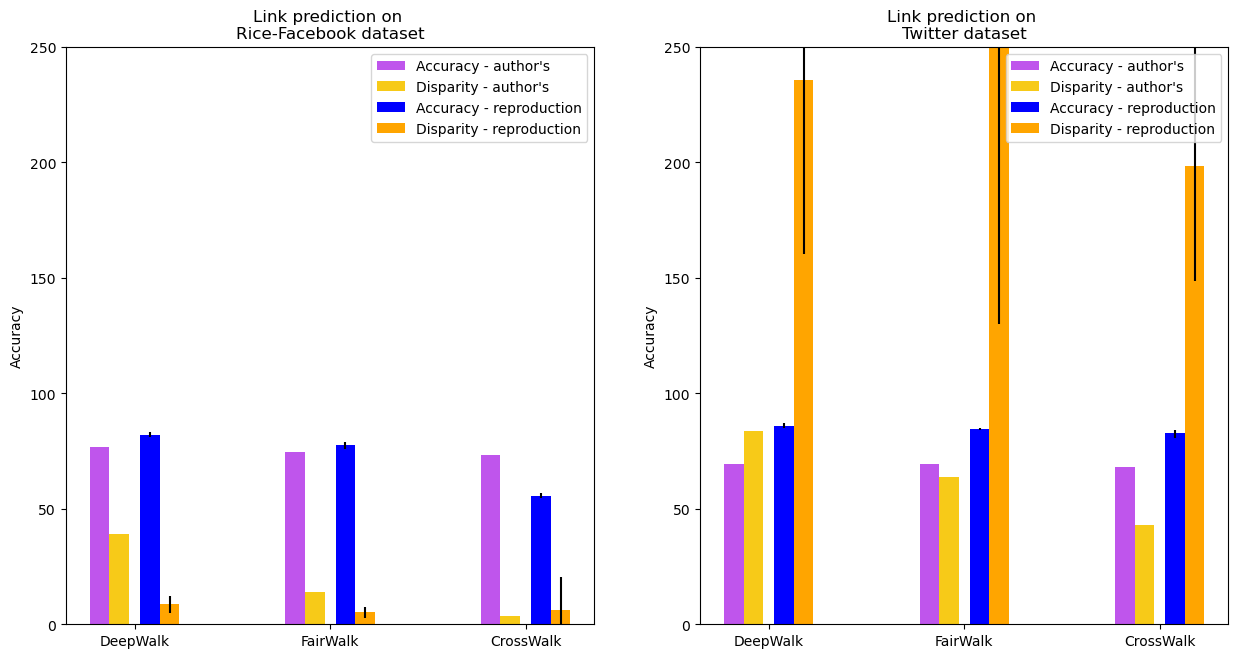

In [11]:
accuracy_means_rice = [76.79, 74.66, 73.26]
disparity_means_rice = [38.91, 13.77, 3.75]

accuracy_means_our_rice = [77.8538223140496, 74.55320247933882, 72.26497933884299]
accuracy_min_max_rice = np.array([[75.69731404958678, 80.13946280991736],[72.62396694214875, 76.18801652892562],[71.30681818181819, 73.4245867768595]])

disparity_means_our_rice = [6.482281946605251, 3.5463783780743072, 4.854143275091014]
disparity_min_max_rice = np.array([[0.5959106358045465, 28.402160397567204], [0.16911859333535692, 13.909153265808861], [0.5987003363942259, 33.18844965572752]])


accuracy_means_twitter = [69.45, 69.17, 68.02]
disparity_means_twitter = [83.65, 63.82, 42.79]

import json
import os

results_dir = '../results/link_prediction'
datasets = ['rice', 'twitter']
dataset_names = ['Rice-Facebook', 'Twitter']
reweight_methods = ['default', 'fairwalk', 'crosswalk']
dataset_metrics = [
    {
        'accuracy_means_auth': [76.79, 74.66, 73.26],
        'disparity_means_auth': [38.91, 13.77, 3.75],
    },
    {
        'accuracy_means_auth': [69.45, 69.17, 68.02],
        'disparity_means_auth': [83.65, 63.82, 42.79],
    }
]

fig, ax = plt.subplots(1, 2, figsize=(15, 7.5))
for ax_id, (dataset, dataset_name, dataset_metrics) in enumerate(zip(datasets, dataset_names, dataset_metrics)):
    inf_mean_ours = []
    inf_min_max = []
    disp_mean_ours = []
    disp_min_max = []

    def process_results(results):
        infs = results['accuracies']
        inf_min_max.append((np.min(infs), np.max(infs)))
        inf_mean_ours.append(np.mean(infs))

        disps = results['disparities']
        disp_min_max.append((np.min(disps), np.max(disps)))
        disp_mean_ours.append(np.mean(disps))

    for rwm in reweight_methods:
        print(f'Loading results for {dataset} dataset and {rwm} reweighting method')
        filename = f'{dataset}_{rwm}.json'
        filepath = os.path.join(results_dir, filename)
        with open(filepath, 'r') as f:
            results = json.load(f)

        process_results(results)

    inf_mean_ours = np.array(inf_mean_ours)
    inf_min_max = np.array(inf_min_max)
    disp_mean_ours = np.array(disp_mean_ours)
    disp_min_max = np.array(disp_min_max)
    acc_means_auth = np.array(dataset_metrics['accuracy_means_auth'])
    disp_means_auth = np.array(dataset_metrics['disparity_means_auth'])

    plot_lp_results(inf_mean_ours, disp_mean_ours, inf_min_max, disp_min_max, acc_means_auth, disp_means_auth, dataset_name, ax[ax_id])